In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planar_utils import *

%matplotlib inline

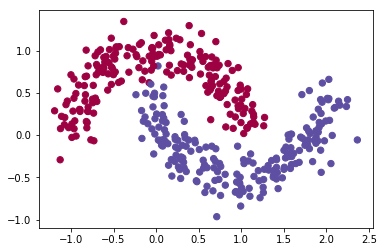

In [2]:
# Load data using helper function and plot it
N = 400
X, Y = sklearn.datasets.make_moons(n_samples=N, noise=.15)
X, Y = X.T, Y.reshape(1, Y.shape[0])
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [16]:
def initialize(X, Y, hidden_layer_size, learning_rate=0.05, function='sigmoid'):
    """
    Weights and biases initialization
    
    Arguments: 
        X - input data
        Y - labels
        hidden_layer_size - number of neurons in the hidden layer
        activation_function - name of preferred activation
    Returns:
        parameters - dictionary containing weights and biases
    """
    n_inputs = X.shape[0]
    n_outputs = Y.shape[0]
    squash_coef = 0.01
    
    # The first layer
    W1 = np.random.randn(hidden_layer_size, n_inputs) * squash_coef
    b1 = np.zeros((hidden_layer_size, 1))
    # The second layer
    W2 = np.random.randn(n_outputs, hidden_layer_size) * squash_coef
    b2 = np.zeros((n_outputs, 1))
    
    activation = {
        'sigmoid': sigmoid,
        'relu': ReLU,
        'tanh': np.tanh
    }
    
    activation_derivative = {
        'sigmoid': sigmoid_derivative,
        'tanh': tanh_derivative,
        'relu': ReLU_derivative
    }
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
        'learning_rate': learning_rate,
        'activation': activation[function],
        'activation_derivative': activation_derivative[function]
    }
    
    return parameters

In [4]:
def forward_propagation(parameters):
    """
    Apply forward propagation
    
    Arguments:
        parameters - dictionary from initialize() function
    Returns:
        hidden_parameters - dictionary containing dot products and activations of dot products for layers
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = parameters['activation'](Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = parameters['activation'](Z2)
    
    hidden_parameters = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2    
    }
    
    return hidden_parameters

In [13]:
def cost(Y_hat, Y):
    """
    Compute cross-entropy loss
    
    Arguments:
        Y_hat - predicted labels
        Y - true labels
    Returns:
        Scalar cross-entropy loss
    """
    
    m = Y.shape[1]
    log = np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))
    return -(1/m) * log

In [17]:
def back_propagation(X, Y, parameters, hidden_parameters):
    """
    Apply back propagation using computed parameters
    
    Arguments:
        X - input data
        Y - true labels
        parameters - weights, biases, functions, etc
        hidden_parameters - dot products a
    """
    
    m = Y.shape[1]
    
    # Get weights and biases
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    l_r = parameters['learning_rate']
    act_derivative = parameters['activation_derivative']

    # Get dot products and activations
    Z1 = parameters['Z1']
    A1 = parameters['A1']
    Z2 = parameters['Z2']
    A2 = parameters['A2']
    
    # Compute derivatives
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(W2.T*dZ2, act_derivative(A1))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Update weights and biases
    W1 -= l_r * dW1
    b1 -= l_r * db1
    W2 -= l_r * dW2
    b2 -= l_r * db2
    
    # Rewrite parameters
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
        'learning_rate': learning_rate,
        'activation': activation[function],
        'activation_derivative': activation_derivative[function]
    }
    
    return parameters